# Heat Flow via Finite Differences

Configuration is (from left to right):<br>
10% aluminum --- 80% polyurethane --- 10% aluminum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nx = 102
Nt = 117000  # 63000 for 7 hours, 117000 for 13 hours (0 to 6 and 0 to 12)
Dx = 0.03    # diverges at 0.00763 --- I have to recheck this
Dt = 0.40    # diverges at 2.32 ------ I have to recheck this

# The bread material in the sandwich: aluminum
kappa1 = 237  # thermal conductivity
c1 = 900      # specific heat
rho1 = 2700   # density

# The material being sandwiched: Polyurethane
kappa2 = 0.3  # thermal conductivity
c2 = 6.56     # specific heat
rho2 = 1260   # density

nt = int(Nt / 500)
T = np.zeros((Nx, 3))
Tpl = np.zeros((Nx, nt+1))

T[1:-1, 0] = 100; T[1:-1, 1] = 100
T[0, 0] = 0; T[-1, 0] = 0    # redundant
T[0, 1] = 0; T[-1, 1] = 0    # redundant
T[0, 2] = 0; T[-1, 2] = 0    # redundant

eta1 = 2 * kappa1 / (c1 * rho1) * Dt / (Dx * Dx)
eta2 = 2 * kappa2 / (c2 * rho2) * Dt / (Dx * Dx)
print(f'eta1: {eta1}')  # diverges if > 0.5
print(f'eta2: {eta2}')  # diverges if > 0.5

m = 1
for t in range(1, Nt):
    T[1:11, 2] = T[1:11, 1] + eta1 * (T[2:12, 1] + T[0:10, 1] - 2*T[1:11, 1])
    T[11:91, 2] = T[11:91, 1] + eta2 * (
        T[12:92, 1] + T[10:90, 1] - 2*T[11:91, 1]
    )
    T[91:101, 2] = T[91:101, 1] + eta1 * (
        T[92:102, 1] + T[90:100, 1] - 2*T[91:101, 1]
    )
    #T[1:-1, 2] = T[1:-1, 1] + eta1 * (T[2:, 1] + T[:-2, 1] - 2 * T[1:-1, 1])
    if t == 1 or t % 500 == 0:
        Tpl[1:-1, m] = T[1:-1, 2]
        m += 1
    T[1:-1, 0] = T[1:-1, 1]
    T[1:-1, 1] = T[1:-1, 2]

y = list(range(1, nt))
x = list(range(1, Nx-1, 2))
X, Y = np.meshgrid(x, y)
Z = Tpl[X, Y]

eta1: 0.08669410150891634
eta2: 0.0322622273841786


## Wireframe Plot

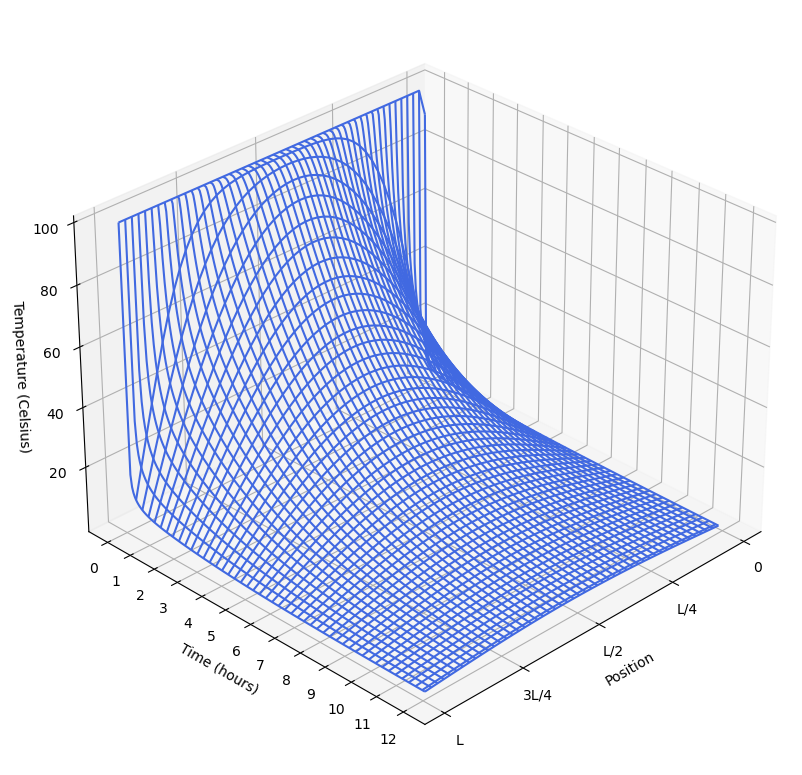

In [3]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color='royalblue')
ax.view_init(30, 45)
ax.set_xlabel('Position')
ax.set_ylabel('Time (hours)')
ax.set_zlabel('Temperature (Celsius)')
xticks = np.linspace(0, Nx-2, 5, dtype=int)
yticks = np.linspace(0, nt, int(Nt*Dt/3600), dtype=int)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(['0', 'L/4', 'L/2', '3L/4', 'L'])
ax.set_yticklabels(np.arange(0, Nt*Dt/3600, dtype=int))
plt.show()

## Surface Plot

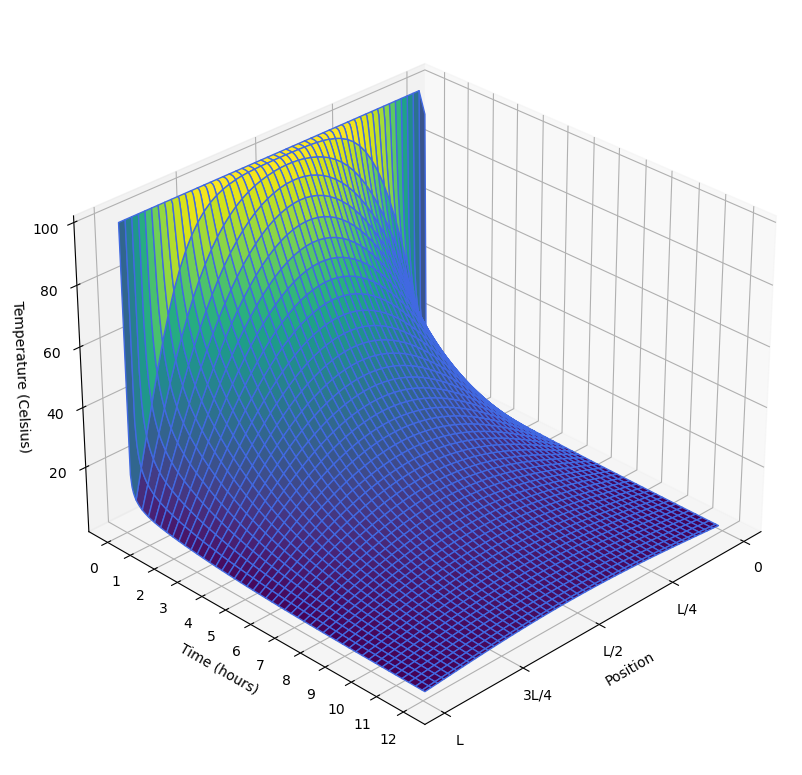

In [4]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, cmap ='viridis', edgecolor ='royalblue') 
ax.view_init(30, 45)
ax.set_xlabel('Position')
ax.set_ylabel('Time (hours)')
ax.set_zlabel('Temperature (Celsius)')
xticks = np.linspace(0, Nx-2, 5, dtype=int)
yticks = np.linspace(0, nt, int(Nt*Dt/3600), dtype=int)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(['0', 'L/4', 'L/2', '3L/4', 'L'])
ax.set_yticklabels(np.arange(0, Nt*Dt/3600, dtype=int))
plt.show()

## Contour Plot

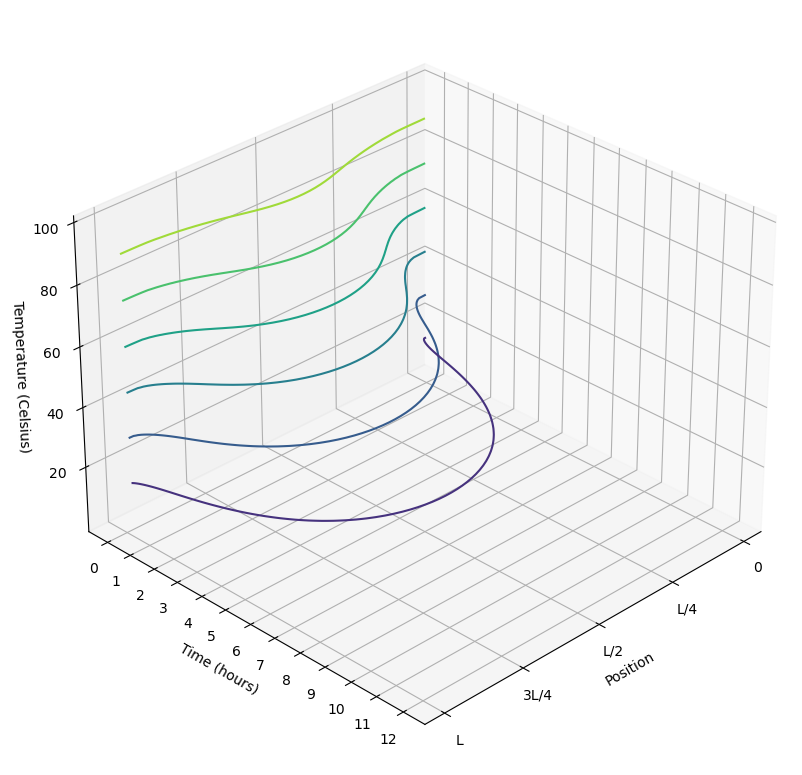

In [5]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection ='3d')
ax.contour3D(X, Y, Z, stride=10)
ax.view_init(30, 45)
ax.set_xlabel('Position')
ax.set_ylabel('Time (hours)')
ax.set_zlabel('Temperature (Celsius)')
xticks = np.linspace(0, Nx-2, 5, dtype=int)
yticks = np.linspace(0, nt, int(Nt*Dt/3600), dtype=int)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(['0', 'L/4', 'L/2', '3L/4', 'L'])
ax.set_yticklabels(np.arange(0, Nt*Dt/3600, dtype=int))
plt.show()

## Scatter Plot

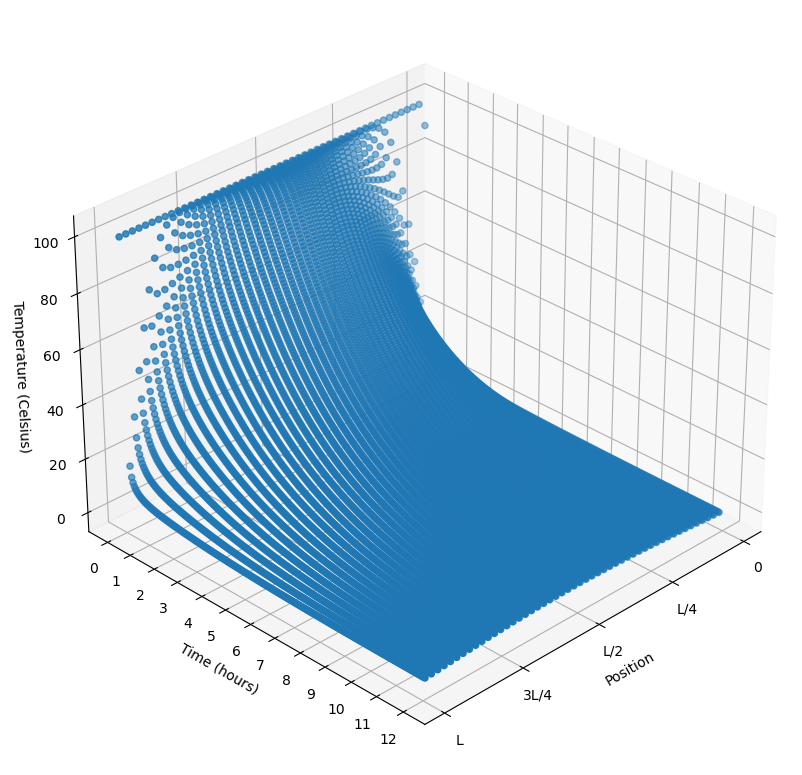

In [6]:
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection ='3d')
ax.scatter(X, Y, Z)
ax.view_init(30, 45)
ax.set_xlabel('Position')
ax.set_ylabel('Time (hours)')
ax.set_zlabel('Temperature (Celsius)')
xticks = np.linspace(0, Nx-2, 5, dtype=int)
yticks = np.linspace(0, nt, int(Nt*Dt/3600), dtype=int)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(['0', 'L/4', 'L/2', '3L/4', 'L'])
ax.set_yticklabels(np.arange(0, Nt*Dt/3600, dtype=int))
plt.show()